In [1]:
import torch
import torchvision
from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transformst
import torchvision.transforms as transforms

In [2]:
def load_cifar10_dataset(is_train=True):
  # Define a transformation to convert images to grayscale
  transforms_1 = transforms.Compose([
      transforms.ToTensor(),
      transforms.Grayscale(num_output_channels=1)  # Convert to grayscale
  ])
  cifar_trainset = datasets.CIFAR10(
      root='./data', train=is_train, download=True, transform=transforms_1)

  # Initialize an empty list to store batches
  all_data = []
  train_loader = torch.utils.data.DataLoader(
      cifar_trainset, batch_size=64, shuffle=True)
  # Iterate over the train_loader to fetch all batches
  for batch in train_loader:
      images, _ = batch  # Extract images from the batch
      all_data.append(images)

  # Concatenate all batches into a single tensor along the batch dimension
  cifar_trainset_tensor = torch.round(torch.cat(all_data, dim=0) * 255)
  cifar_labels = torch.tensor(cifar_trainset.targets)
  print("cifar_trainset_tensor shape ", cifar_trainset_tensor.shape)
  print("cifar_labels ", cifar_labels.shape)
  return (cifar_trainset_tensor, cifar_labels)


train_tensor, labels = load_cifar10_dataset()


train_tensor[1][0]

Files already downloaded and verified
cifar_trainset_tensor shape  torch.Size([50000, 1, 32, 32])
cifar_labels  torch.Size([50000])


tensor([[100.,  99.,  99.,  ...,  98.,  98.,  99.],
        [ 99.,  99.,  99.,  ...,  98.,  98.,  98.],
        [100., 100., 101.,  ...,  99.,  98.,  99.],
        ...,
        [105., 104., 104.,  ..., 102., 102., 103.],
        [105., 104., 104.,  ..., 102., 102., 103.],
        [105., 104., 104.,  ..., 111., 110., 110.]])

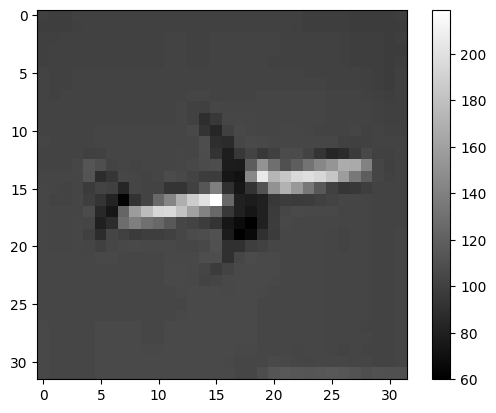

In [3]:
import matplotlib.pyplot as plt
import torch

# Assuming train_tensor[1][0] is your grayscale image tensor
image_tensor = train_tensor[1][0]

# Check if the tensor is on a CUDA device and move it to CPU
if image_tensor.is_cuda:
    image_tensor = image_tensor.cpu()

# Convert the tensor to a numpy array
image_numpy = image_tensor.numpy()

# Since it's grayscale, squeeze out the channel dimension if it exists
if image_tensor.dim() > 2:
    image_numpy = image_numpy.squeeze(0)

# Plot the image
plt.imshow(image_numpy, cmap='gray')
plt.colorbar()  # Optional, it adds a color bar to the side
plt.show()

In [ ]:
def calculate_marginal_probabilities(data, dim=0):
    # Calculate the marginal probabilities
    marginal_probabilities = data[dim].sum() / data.sum()
    return marginal_probabilities

In [9]:
Mock_data = torch.Tensor([[20.0, 70.0, 80.0, 10.0], [40.0, 10.0, 30.0, 5.0]])

print(calculate_marginal_probabilities(Mock_data, dim=0))
print(calculate_marginal_probabilities(Mock_data, dim=1))


tensor(0.6792)
tensor(0.3208)


In [12]:
def calculate_conditional_probabilities(data):
    # Calculate the conditional probabilities
    n_classes = data.shape[0]

    p_tensor = torch.zeros(data.shape)

    for i in range(n_classes):
        row_sum = data[i].sum()
        p_tensor[i] = data[i] / row_sum

    return p_tensor

p_tensor = calculate_conditional_probabilities(Mock_data)

print("Probabilities for class 0: ", p_tensor[0])
print("Probabilities for class 1: ", p_tensor[1])


Probabilities for class 0:  tensor([0.1111, 0.3889, 0.4444, 0.0556])
Probabilities for class 1:  tensor([0.4706, 0.1176, 0.3529, 0.0588])
